<a href="https://colab.research.google.com/github/deepacu1986/DATA-SCIENCE-ASSIGNMENTS/blob/main/Randonforest_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest

Dataset Description:

Use the Glass dataset and apply the Random forest model.

1. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, inconsistencies in the data.

2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

4: Random Forest Model Implementation
1. Divide the data into train and test split.
2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

5: Bagging and Boosting Methods
Apply the Bagging and Boosting methods and compare the results.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [ ]:
df=pd.read_excel('/content/glass.xlsx',sheet_name='glass')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


<Axes: >

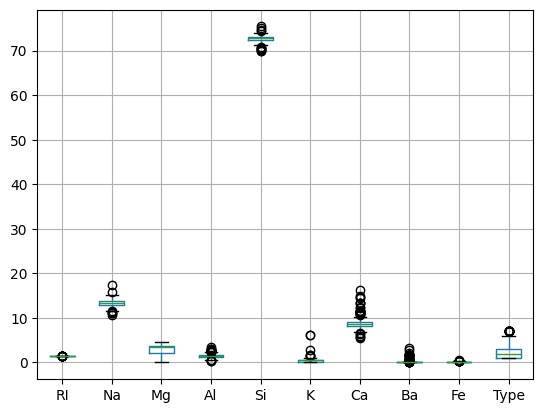

In [ ]:
df.boxplot()

In [ ]:
def outliers_capping(df,columns):
  for col in columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-(1.5*IQR)
    upper_bound=Q3+(1.5*IQR)
    df[col]=np.where(df[col]<lower_bound,lower_bound,df[col])
    df[col]=np.where(df[col]>upper_bound,upper_bound,df[col])
outliers_capping(df,df.columns)

<Axes: >

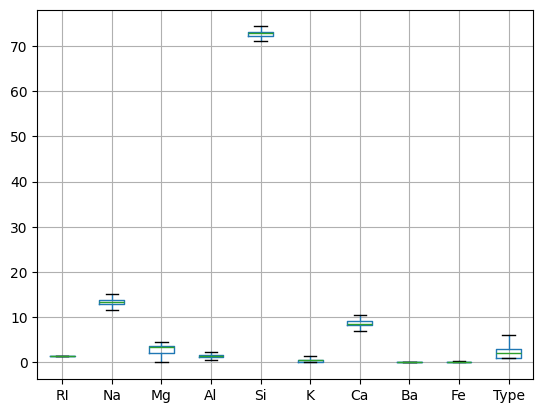

In [ ]:
df.boxplot()

<Axes: >

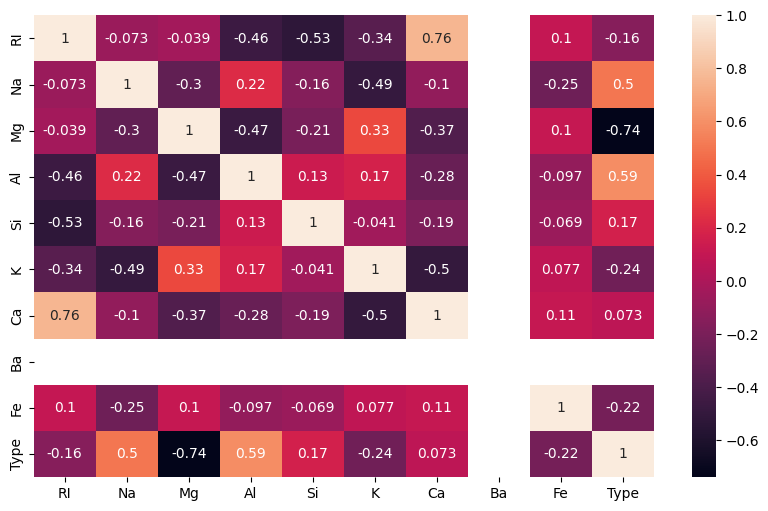

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Type'>

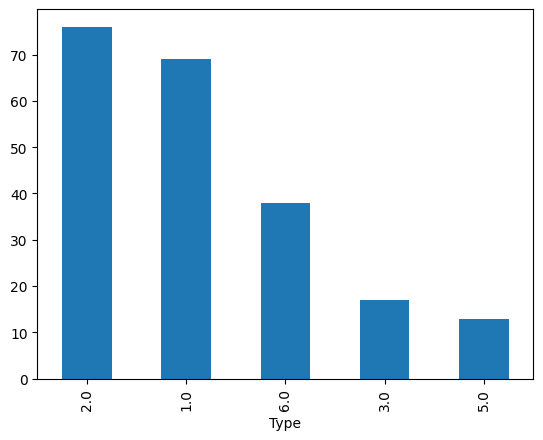

In [ ]:
df.Type.value_counts()
df.Type.value_counts().plot(kind='bar')

In [ ]:
target=df['Type']
features=df.drop(['Type','Ba'],axis=1)
stdsca=StandardScaler()
features=pd.DataFrame(stdsca.fit_transform(features),columns=features.columns)
features

,RI,Na,Mg,Al,Si,K,Ca,Fe
0,1.216093,0.322680,1.257238,-0.773927,-1.361078,-1.253536,-0.044419,-0.621102
1,-0.227207,0.660556,0.639311,-0.154741,0.086641,0.124799,-1.115733,-0.621102
2,-0.834242,0.174014,0.604596,0.273927,0.482859,-0.170559,-1.173956,-0.621102
3,-0.205982,-0.258467,0.701798,-0.321445,-0.096228,0.420156,-0.661589,-0.621102
4,-0.307862,-0.177377,0.653197,-0.440519,0.620012,0.354521,-0.836260,-0.621102
...,...,...,...,...,...,...,...,...
208,-0.813017,0.998432,-1.860172,2.060042,-0.096228,-1.187901,0.456303,-0.621102
209,-0.549827,2.052606,-1.860172,1.345596,0.589533,-1.450441,-0.451984,-0.621102
210,1.063273,1.295764,-1.860172,1.417041,1.138143,-1.450441,-0.405405,-0.621102
211,-0.694157,1.322794,-1.860172,1.226522,1.427687,-1.450441,-0.358827,-0.621102


In [ ]:

x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(170, 8)
(43, 8)
(170,)
(43,)


In [ ]:
rand_for=RandomForestClassifier(n_estimators=100,max_features='sqrt',max_depth=3,bootstrap=True,criterion='gini')

In [ ]:
rand_for.fit(x_train,y_train)

RandomForestClassifier(max_depth=3)

In [ ]:
y_pred=rand_for.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.6976744186046512

In [ ]:
# Bagging

In [ ]:
bagging=BaggingClassifier(n_estimators=100,max_samples=0.8,max_features=0.8)

In [ ]:
bagging.fit(x_train,y_train)

BaggingClassifier(max_features=0.8, max_samples=0.8, n_estimators=100)

In [ ]:
y_pred=bagging.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8372093023255814

In [ ]:
#boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
gboost=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3)

In [ ]:
gboost.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred=gboost.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7674418604651163

In [ ]:
!pip install xgboost

In [ ]:
# Step 1: Clear any old models or cached state (especially in notebook environments)
import gc
import xgboost as xgb
gc.collect()  # Helps clear any lingering models

# Step 2: Recheck your y_train labels
import numpy as np
y_train = np.array(y_train).astype(int)
print("Unique classes in y_train:", np.unique(y_train))
# Should print: [1 2 3 5 6]
y_test = np.array(y_test).astype(int)
# Optional: remap labels if necessary
# If you want to map your labels to 0-indexed integers:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)
print("Encoded classes:", np.unique(y_train_encoded))  # Should now be [0 1 2 3 4]

# Step 3: Fit a clean new model
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100,max_features=0.9,subsample=1,max_depth=2,learning_rate=0.5,reg_lambda=10,reg_alpha=2,min_child_weight=2)
model.fit(x_train, y_train_encoded)


Unique classes in y_train: [1 2 3 5 6]
Encoded classes: [0 1 2 3 4]


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_features=0.9,
              max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy_score(y_test_encoded,y_pred)

0.7441860465116279